In [1]:
import numpy as np
import pylab as plt

In [2]:
V0 = 10

In [3]:
observaciones = np.genfromtxt('CircuitoRC.txt',delimiter=' ')

In [4]:
t = observaciones[:,0]
q_obs = observaciones[:,1]

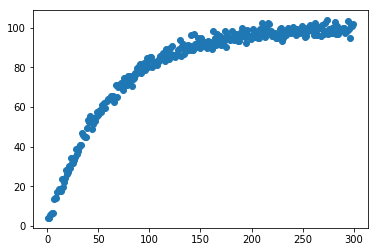

In [5]:
fig1, ax1 = plt.subplots()
ax1.scatter(t,q_obs)
plt.show()
fig1.savefig('circuito_datos.pdf')
plt.close()

In [6]:
def funcion_estimada(t,coef):
    return coef[0]*V0*(1-np.exp(-t/(coef[1]*coef[0]))) 

In [7]:
def likelihood(q_obs,q_est):
    chi2 = np.sum(((q_obs-q_est)/np.std(q_obs))**2)
    l = np.exp(-chi2/2.0)
    l_min = 1e-50
    if l < l_min:
        return l_min
    else:
        return l 

0.00


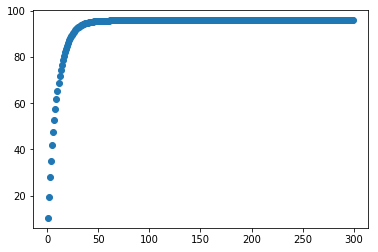

In [8]:
n_puntos = 100000
coef = [np.random.rand(2)]
coef[0][0]*=10
q_est = funcion_estimada(t,coef[0])
lklhood = [likelihood(q_obs,q_est)]
print("%.2f" % lklhood[0])
plt.scatter(t,q_est)
plt.show()
plt.close()

In [9]:
for punto in range(0,n_puntos):
    coef_nuevo = np.maximum(np.random.normal(coef[punto], [5,10]),np.array([1e-50,1e-50]))
    q_est_nuevo = funcion_estimada(t,coef_nuevo)
    lklhood_nuevo = likelihood(q_obs,q_est_nuevo)   
    alpha = lklhood_nuevo/lklhood[punto]   
    if alpha >= 1:
        coef.append(coef_nuevo)
        lklhood.append(lklhood_nuevo)
    elif alpha > np.random.rand():
        coef.append(coef_nuevo)
        lklhood.append(lklhood_nuevo)
    else:
        coef.append(coef[punto])
        lklhood.append(lklhood[punto])

In [10]:
max_id = np.argmax(lklhood)
coef_max = coef[max_id]
lklh_max = lklhood[max_id]
q_est_max = funcion_estimada(t,coef_max)

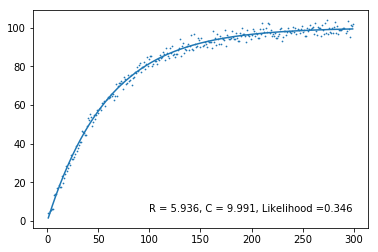

In [11]:
fig2, ax2 = plt.subplots()
ax2.scatter(t,q_obs,s=0.5)
ax2.plot(t,q_est_max)
plt.text(100,5,r'R = ''%.3f,'r' C = ''%.3f'r', Likelihood =''%.3f' % (coef_max[1],coef_max[0],lklh_max))
plt.show()
fig2.savefig('estimacion_circuito.pdf')
plt.close()

In [12]:
print(lklh_max)

0.345672237163


In [13]:
print(coef_max)

[ 9.99114241  5.93571615]


In [14]:
coef_array = np.array(coef)
R = coef_array[:,1]
C = coef_array[:,0]

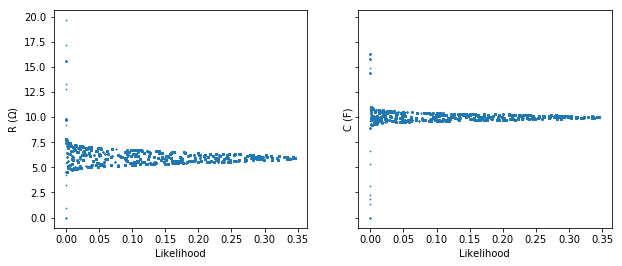

In [21]:
fig3, ax3 = plt.subplots(1,2, sharey = True, figsize=(10, 4))
ax3[0].set_xlabel(r'Likelihood')
ax3[0].set_ylabel(r'R ($\Omega$)')
ax3[1].set_xlabel(r'Likelihood')
ax3[1].set_ylabel(r'C'' (F)')
ax3[0].scatter(lklhood,R,s=0.5)
ax3[1].scatter(lklhood,C,s=0.5)
plt.show()
fig3.savefig('RC_vs_likelihood.pdf')
plt.close()